In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# Carregamento dos datasets
gameDf = pd.read_csv("/content/drive/MyDrive/IA/Dados Projeto/filtered_games.csv")
games_desc = pd.read_json("/content/drive/MyDrive/IA/Dados Projeto/games_metadata.json", lines=True)
recommendationDf = pd.read_csv("/content/drive/MyDrive/IA/Dados Projeto/filtered_recommendations.csv")
recommendationDf = recommendationDf.sample(n=10000, random_state=42).reset_index(drop=True)

In [4]:
# Deixando as colunas úteis
recommendationDf = recommendationDf.drop(['review_id', 'date', 'funny', 'helpful'], axis=1)

In [5]:
games_desc = games_desc[games_desc['app_id'].isin(recommendationDf['app_id'])] # removendo de 'game_desc' os jogos que nao estao em 'recommendationDf'

In [6]:
games_desc['title'] = games_desc['app_id'].map(gameDf.set_index('app_id')['title']) # Adicionando os titulos na base

<ipython-input-6-236a3a31a637>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_desc['title'] = games_desc['app_id'].map(gameDf.set_index('app_id')['title']) # Adicionando os titulos na base


In [7]:
recommendationDf

,app_id,is_recommended,hours,user_id
0,359550,False,1.0,4266016
1,414340,True,13.5,13001649
2,251990,True,4.5,8360025
3,322500,True,6.0,6793285
4,363440,True,1.3,748899
...,...,...,...,...
9995,322330,False,0.4,326307
9996,315810,True,4.5,10971912
9997,67370,True,16.5,11446587
9998,231430,True,29.8,5068444


In [8]:
games_desc

,app_id,description,tags,title
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St...",Monaco: What's Yours Is Mine
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra...",Dungeon of the ENDLESS™
5,250180,"“METAL SLUG 3”, the masterpiece in SNK’s emble...","[Arcade, Classic, Action, Co-op, Side Scroller...",METAL SLUG 3
6,253980,Experience incredibly atmospheric and intense ...,"[RPG, Action, Fantasy, Third Person, Hack and ...",Enclave
8,282900,"Packed with fast-paced, turn-based RPG action,...","[Anime, JRPG, Female Protagonist, Cute, RPG, S...",Hyperdimension Neptunia Re;Birth1
...,...,...,...,...
50782,477160,,[],Human: Fall Flat
50783,632470,,[],Disco Elysium - The Final Cut
50787,250900,,[],The Binding of Isaac: Rebirth
50788,920210,,[],LEGO® Star Wars™: The Skywalker Saga


In [9]:
# Verificando valores nulos
print(f"Recommendation Dataset:\n{recommendationDf.isnull().sum()}")

Recommendation Dataset:
app_id            0
is_recommended    0
hours             0
user_id           0
dtype: int64


In [10]:
# Identificar linhas com listas de tags vazias
empty_tags_mask = games_desc['tags'].apply(lambda x: len(x) == 0)

# Remover as linhas
games_desc = games_desc[~empty_tags_mask].reset_index(drop=True)

In [11]:
import re

def removeSpecialCharacters(x):
  return re.sub(r'[^\w\s]', '', x)


games_desc['tags'] = games_desc['tags'].apply(lambda x: ' '.join(x)) # Deixar a lista de tags separada por espaços

# Remover os caracteres especiais
games_desc['tags'] = games_desc['tags'].apply(lambda x: removeSpecialCharacters(x))
games_desc['title'] = games_desc['title'].apply(lambda x: removeSpecialCharacters(x))
games_desc['description'] = games_desc['description'].apply(lambda x: removeSpecialCharacters(x))

# Nova coluna tags + description
games_desc['overview'] = games_desc['description'] + ' ' + games_desc['tags']
games_desc

,app_id,description,tags,title,overview
0,113020,Monaco Whats Yours Is Mine is a single player ...,Coop Stealth Indie Heist Local CoOp Strategy O...,Monaco Whats Yours Is Mine,Monaco Whats Yours Is Mine is a single player ...
1,249050,Dungeon of the Endless is a RogueLike DungeonD...,Roguelike Strategy Tower Defense Pixel Graphic...,Dungeon of the ENDLESS,Dungeon of the Endless is a RogueLike DungeonD...
2,250180,METAL SLUG 3 the masterpiece in SNKs emblemati...,Arcade Classic Action Coop Side Scroller Retro...,METAL SLUG 3,METAL SLUG 3 the masterpiece in SNKs emblemati...
3,253980,Experience incredibly atmospheric and intense ...,RPG Action Fantasy Third Person Hack and Slash...,Enclave,Experience incredibly atmospheric and intense ...
4,282900,Packed with fastpaced turnbased RPG action fou...,Anime JRPG Female Protagonist Cute RPG Singlep...,Hyperdimension Neptunia ReBirth1,Packed with fastpaced turnbased RPG action fou...
...,...,...,...,...,...
1739,2066020,Face the Lords of the Void and their endless m...,Early Access Action RPG Action Roguelike Bulle...,Soulstone Survivors,Face the Lords of the Void and their endless m...
1740,2087030,Shatterline is a fastpaced freetoplay FPS with...,Action FPS Shooter Multiplayer Free to Play Pv...,Shatterline,Shatterline is a fastpaced freetoplay FPS with...
1741,299460,Woodle Tree Adventures is an old school platfo...,Indie Platformer Adventure Cute 3D Platformer ...,Woodle Tree Adventures,Woodle Tree Adventures is an old school platfo...
1742,1281930,Dig Fight and Build your way through the world...,Adventure Action Free to Play Indie RPG Mod Sa...,tModLoader,Dig Fight and Build your way through the world...


In [12]:
# Juntando tudo em uma base só
colabDf = recommendationDf.copy()
colabDf['title'] = colabDf['app_id'].map(games_desc.set_index('app_id')['title'])
colabDf['overview'] = colabDf['app_id'].map(games_desc.set_index('app_id')['overview'])
colabDf['tags'] = colabDf['app_id'].map(games_desc.set_index('app_id')['tags'])
colabDf['description'] = colabDf['app_id'].map(games_desc.set_index('app_id')['description'])

In [13]:
colabDf = colabDf.dropna()
contentDf = colabDf.copy().drop_duplicates(subset=['app_id'])
colabDf

,app_id,is_recommended,hours,user_id,title,overview,tags,description
1,414340,True,13.5,13001649,Hellblade Senuas Sacrifice,From the makers of Heavenly Sword Enslaved Ody...,Atmospheric Psychological Female Protagonist S...,From the makers of Heavenly Sword Enslaved Ody...
2,251990,True,4.5,8360025,Long Live The Queen,Rule the world or die tryingBeing a Princess i...,Visual Novel Political Sim Anime Female Protag...,Rule the world or die tryingBeing a Princess i...
3,322500,True,6.0,6793285,SUPERHOT,SUPERHOT is the smashhit FPS where time moves ...,Action FPS Bullet Time Time Manipulation Indie...,SUPERHOT is the smashhit FPS where time moves ...
4,363440,True,1.3,748899,Mega Man Legacy Collection,Mega Man Legacy Collection is a celebration of...,Platformer Retro Classic Action 2D Pixel Graph...,Mega Man Legacy Collection is a celebration of...
5,214490,True,1.0,6111896,Alien Isolation,Discover the true meaning of fear in Alien Iso...,Horror Survival Horror Scifi Aliens Atmospheri...,Discover the true meaning of fear in Alien Iso...
...,...,...,...,...,...,...,...,...
9994,224460,True,4.6,8870423,Contrast,CONTRAST is a puzzleplatform game where you ca...,Indie Female Protagonist Adventure Noir Puzzle...,CONTRAST is a puzzleplatform game where you ca...
9996,315810,True,4.5,10971912,eden,A tale of the planets final love story told us...,Visual Novel Anime Story Rich Romance Adventur...,A tale of the planets final love story told us...
9997,67370,True,16.5,11446587,The Darkness II,An intense first person shooter that delivers ...,FPS Action Gore Shooter Dark Singleplayer Coop...,An intense first person shooter that delivers ...
9998,231430,True,29.8,5068444,Company of Heroes 2,Experience the ultimate WWII RTS platform with...,Strategy World War II RTS Multiplayer Tactical...,Experience the ultimate WWII RTS platform with...


In [14]:
contentDf

,app_id,is_recommended,hours,user_id,title,overview,tags,description
1,414340,True,13.5,13001649,Hellblade Senuas Sacrifice,From the makers of Heavenly Sword Enslaved Ody...,Atmospheric Psychological Female Protagonist S...,From the makers of Heavenly Sword Enslaved Ody...
2,251990,True,4.5,8360025,Long Live The Queen,Rule the world or die tryingBeing a Princess i...,Visual Novel Political Sim Anime Female Protag...,Rule the world or die tryingBeing a Princess i...
3,322500,True,6.0,6793285,SUPERHOT,SUPERHOT is the smashhit FPS where time moves ...,Action FPS Bullet Time Time Manipulation Indie...,SUPERHOT is the smashhit FPS where time moves ...
4,363440,True,1.3,748899,Mega Man Legacy Collection,Mega Man Legacy Collection is a celebration of...,Platformer Retro Classic Action 2D Pixel Graph...,Mega Man Legacy Collection is a celebration of...
5,214490,True,1.0,6111896,Alien Isolation,Discover the true meaning of fear in Alien Iso...,Horror Survival Horror Scifi Aliens Atmospheri...,Discover the true meaning of fear in Alien Iso...
...,...,...,...,...,...,...,...,...
9901,893850,False,26.2,8203366,THE LONGING,An unusual mix of adventure and idle game In u...,Walking Simulator Point Click Choose Your Own...,An unusual mix of adventure and idle game In u...
9904,1238880,True,99.8,3816605,Battlefield Hardline,Strategy Speed Story These are the core pillar...,Action Multiplayer Shooter Singleplayer FPS Wa...,Strategy Speed Story These are the core pillar...
9907,513000,True,0.1,13934014,KUBOOM,Crossplatform hurricane online 3D Shooter Free...,Free to Play Action Multiplayer FPS Shooter Fi...,Crossplatform hurricane online 3D Shooter
9936,1641270,True,1.0,9782996,枝江往事,在枝江市这座繁华的城市ASoul五个女孩为了自己的梦想努力奋斗为了朋友为了梦想为了一切未来所...,Casual Interactive Fiction Word Game Visual No...,在枝江市这座繁华的城市ASoul五个女孩为了自己的梦想努力奋斗为了朋友为了梦想为了一切未来所...


In [15]:
# Normalizar os IDs
# Fazer com que sejam consecutivos a partir de zero
# para evitar problemas de memoria na hora de fazer a metriz de utilidade
user_id_map = {id: idx for idx, id in enumerate(colabDf['user_id'].unique())}
app_id_map = {id: idx for idx, id in enumerate(colabDf['app_id'].unique())}

colabDf['user_id'] = colabDf['user_id'].map(user_id_map)
colabDf['app_id'] = colabDf['app_id'].map(app_id_map)

<ipython-input-16-5e24f086d635>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_recommended', data=colabDf, palette='tab10')


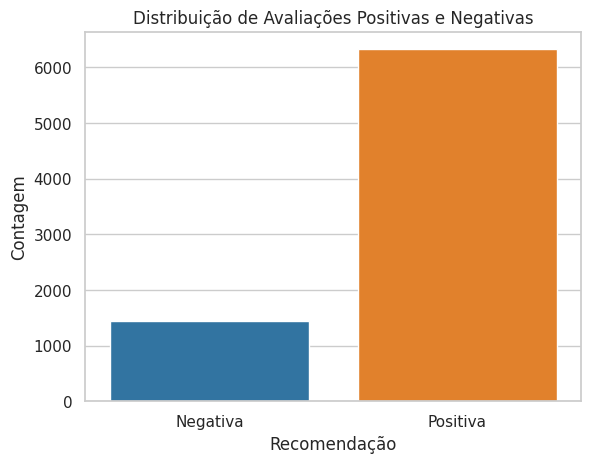

In [16]:
# Grafico de Avaliações Positivas e Negativas
# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de barras
sns.countplot(x='is_recommended', data=colabDf, palette='tab10')

# Adicionando título e rótulos
plt.title('Distribuição de Avaliações Positivas e Negativas')
plt.xlabel('Recomendação')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Negativa', 'Positiva'])

# Mostrando o gráfico
plt.show()

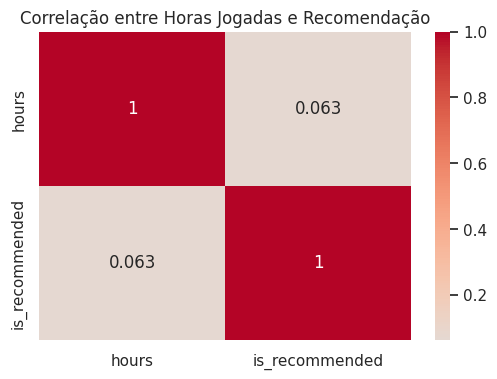

In [17]:
corr_matrix = colabDf[['hours', 'is_recommended']].corr()

plt.figure(figsize=(6, 4))

# Criar o heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlação entre Horas Jogadas e Recomendação')

# Mostrar o gráfico
plt.show()

<ipython-input-18-78bbb4f8dc9d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='hours', data=colabDf, palette='tab10')


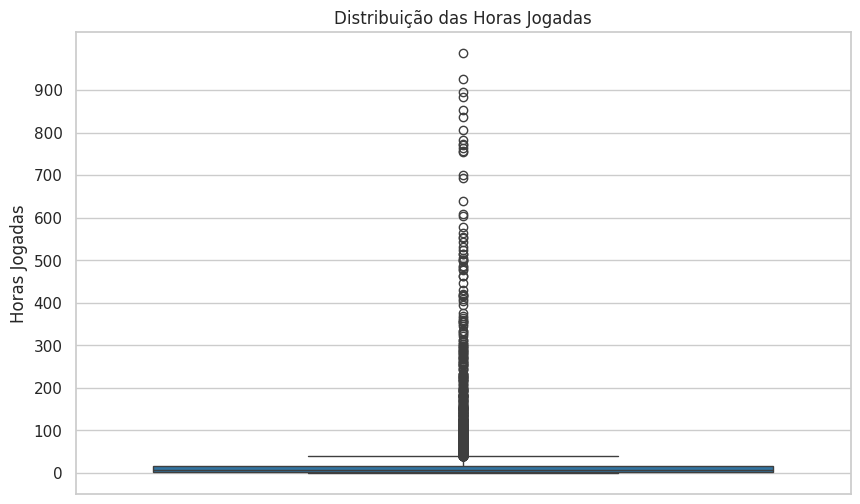

In [18]:
# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='hours', data=colabDf, palette='tab10')

# Adicionando título e rótulos
plt.title('Distribuição das Horas Jogadas')
plt.ylabel('Horas Jogadas')
plt.yticks(range(int(colabDf['hours'].min()), int(colabDf['hours'].max()), 100))

# Mostrando o gráfico
plt.show()

In [19]:
colabDf['hours'].describe()

,hours
count,7770.000000
mean,20.365637
std,57.652225
min,0.000000
25%,2.100000
50%,6.200000
75%,17.000000
max,987.000000


In [20]:
# Aplicando a transformação logarítmica
colabDf['log_hours'] = np.log1p(colabDf['hours'])
colabDf = colabDf.drop(columns=['hours'])

<ipython-input-21-c26a603ed9df>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='log_hours', data=colabDf, palette='tab10')


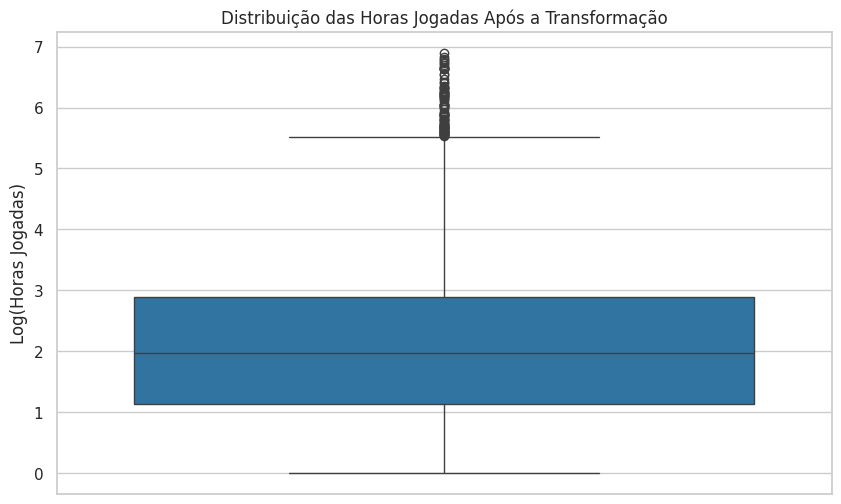

In [21]:
# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='log_hours', data=colabDf, palette='tab10')

# Adicionando título e rótulos
plt.title('Distribuição das Horas Jogadas Após a Transformação')
plt.ylabel('Log(Horas Jogadas)')

# Mostrando o gráfico
plt.show()

In [22]:
colabDf['log_hours'].describe()

,log_hours
count,7770.000000
mean,2.077695
std,1.268551
min,0.000000
25%,1.131402
50%,1.974081
75%,2.890372
max,6.895683


## **COLABORATIVA**

In [23]:
# Fazendo a matriz de utilidade e separando a base em treino e teste
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Treino e teste
train, test = train_test_split(colabDf, test_size=0.2, random_state=42)

test = test[test['user_id'].isin(train['user_id'])]

# Matriz de utilidade
# Utilizando 2 colunas para os valores
train_sparse = csr_matrix((train['is_recommended'] * train['log_hours'], (train['user_id'], train['app_id'])))
test_sparse = csr_matrix((test['is_recommended'] * test['log_hours'], (test['user_id'], test['app_id'])))

similarity_user_matrix = cosine_similarity(train_sparse)

In [24]:
from sklearn.neighbors import NearestNeighbors

# Treinar o modelo kNN baseado em usuários
knn = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='cosine')
knn.fit(train_sparse)

# Função para fazer recomendações baseada em usuários semelhantes
def recommend_colab(user_index, similarity_user_matrix, user_item_matrix, df, n_recommendations):
    # Calcula as similaridades do usuário em questão com os demais
    similar_users = similarity_user_matrix[user_index]

    # Ordena os usuários pela similaridade
    similar_users_indices = similar_users.argsort()[::-1]

    recommended_game_ids = set()
    user_rated_games = np.where(user_item_matrix[user_index].toarray().flatten() > 0)[0]

    for similar_user_index in similar_users_indices:
        if similar_user_index == user_index:
            continue

        similar_user_rated_games = np.where(user_item_matrix[similar_user_index].toarray().flatten() > 0)[0]

        # Adiciona jogos que o usuário similar jogou, mas o usuário atual não jogou
        recommendations = set(similar_user_rated_games) - set(user_rated_games)
        recommended_game_ids.update(recommendations)

        if len(recommended_game_ids) >= n_recommendations:
            break

    # Converte os IDs dos jogos recomendados para títulos
    recommended_titles = [df.loc[df['app_id'] == game_id, 'title'].values[0] for game_id in recommended_game_ids]

    return recommended_titles[:n_recommendations]

# Testar a recomendação
user = 104
jogos = recommend_colab(user_index=user, similarity_user_matrix=similarity_user_matrix, user_item_matrix=train_sparse, df=colabDf, n_recommendations=5)
print(f"Recomendações para o usuário {user}: {jogos}")

Recomendações para o usuário 104: ['Freedom Planet', 'Mirror 2 Project X', 'Alien Swarm Reactive Drop', 'Shadow of the Tomb Raider Definitive Edition', 'Rise of the Tomb Raider']


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

distances, indices = knn.kneighbors(train_sparse, n_neighbors=10)

# Simulando previsões
recommendations = []
for neighbor_indices in indices:
    neighbor_recommendations = train_sparse[neighbor_indices].sum(axis=0)  # Soma das interações dos vizinhos
    recommended_items = np.argsort(-neighbor_recommendations)  # Ordena pelo número de interações
    recommendations.append(recommended_items[:10])  # Pega os top 10 recomendados

predictions = np.array(recommendations)

predictions.shape

(1132, 1, 1744)

In [39]:
from sklearn.metrics import precision_score, recall_score

# Supondo que você já tenha treinado seu modelo e tenha as previsões
# test_sparse: matriz de teste (sparse)
# indices: lista de vizinhos mais próximos obtida pelo modelo KNN

# y_true será extraído da matriz de teste (test_sparse)
y_true = []
for user_index in range(test_sparse.shape[0]):
    # Itens com interações positivas no conjunto de teste
    user_test_items = test_sparse[user_index].nonzero()[1].tolist()  # Converte para lista
    y_true.append(user_test_items)

# Simulação de previsões (conforme o seu código)
predictions = []
for neighbor_indices in indices:
    neighbor_recommendations = train_sparse[neighbor_indices].sum(axis=0)
    recommended_items = np.argsort(-neighbor_recommendations)[:10].tolist()  # Converte para lista
    predictions.append(recommended_items)

# y_pred é a lista de previsões feitas pelo modelo
y_pred = predictions

# Agora calcule a precisão e o recall para cada usuário
precision_list = []
recall_list = []

for true_items, pred_items in zip(y_true, y_pred):
    # Converte para conjuntos para interseção
    true_set = set(true_items)
    pred_set = set(pred_items)

    # Calcule a precisão e o recall para o usuário atual
    if len(pred_set) > 0:
        precision = len(true_set & pred_set) / float(len(pred_set))
    else:
        precision = 0.0

    if len(true_set) > 0:
        recall = len(true_set & pred_set) / float(len(true_set))
    else:
        recall = 0.0

    precision_list.append(precision)
    recall_list.append(recall)

# Média da precisão e recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print(f"Average Precision@10: {average_precision:.4f}")
print(f"Average Recall@10: {average_recall:.4f}")


TypeError: unhashable type: 'list'

In [25]:
train_columns = train_sparse.indices
test_columns = test_sparse.indices

# Identifique as colunas ausentes no conjunto de teste
missing_columns = set(train_columns) - set(test_columns)
print("Colunas ausentes no conjunto de teste:", missing_columns)

Colunas ausentes no conjunto de teste: {1, 6, 7, 21, 23, 24, 28, 31, 33, 34, 37, 39, 42, 44, 45, 51, 54, 61, 63, 65, 66, 67, 74, 76, 80, 85, 89, 111, 117, 119, 120, 125, 126, 129, 132, 137, 145, 148, 149, 151, 154, 156, 157, 158, 163, 171, 177, 179, 185, 187, 188, 190, 193, 196, 197, 199, 204, 206, 207, 212, 213, 220, 227, 230, 231, 239, 253, 255, 256, 257, 259, 260, 261, 262, 263, 266, 267, 271, 273, 275, 276, 281, 294, 300, 301, 302, 306, 309, 318, 321, 322, 323, 326, 327, 328, 329, 331, 338, 341, 342, 357, 359, 360, 361, 363, 364, 368, 373, 375, 382, 383, 388, 389, 398, 400, 402, 405, 406, 411, 414, 415, 416, 421, 424, 435, 436, 440, 445, 447, 450, 456, 459, 474, 475, 477, 479, 481, 482, 492, 495, 496, 500, 501, 503, 507, 508, 514, 517, 518, 519, 520, 522, 524, 528, 529, 531, 532, 533, 536, 537, 539, 540, 545, 546, 548, 549, 551, 553, 554, 555, 556, 560, 576, 578, 579, 580, 581, 584, 588, 589, 592, 594, 598, 600, 604, 606, 609, 611, 613, 614, 617, 619, 620, 622, 625, 631, 636, 638, 

In [26]:
print(test_sparse.shape)
print(train_sparse.shape)

(1131, 1743)
(1132, 1744)


In [27]:
from scipy.sparse import csr_matrix, hstack

# Obter as colunas existentes em ambas as matrizes
train_columns = set(range(train_sparse.shape[1]))  # Todas as colunas no treino
test_columns = set(test_sparse.indices)  # Colunas ativas no teste

# Identificar colunas que estão na matriz de treino mas ausentes na de test
missing_columns = train_columns - test_columns

# Adicionar colunas ausentes ao test
for col in sorted(missing_columns):  # Garantir que adicionamos em ordem
    zeros = csr_matrix((test_sparse.shape[0], 1))  # Uma coluna de zeros para cada linha em 'test_sparse'
    test_sparse = hstack([test_sparse, zeros])

# Certificar de que as colunas estão ordenadas corretamente
# Primeiro, obtenha todas as colunas no formato CSR
if test_sparse.shape[1] > train_sparse.shape[1]:
    test_sparse = test_sparse[:, :train_sparse.shape[1]]

# Agora a matriz de teste deve ter o mesmo número de colunas que a de treino
test_sparse = test_sparse.tocsr()

print("Novas dimensões de test_sparse:", test_sparse.shape)


Novas dimensões de test_sparse: (1131, 1744)


# **BASEADO EM CONTEÚDO**

In [29]:
games_stem = contentDf.copy() # Cópia da base para fazer testes com Stemming
games_stem = games_stem.drop(columns=['user_id', 'hours', 'is_recommended'])
games_stem

,app_id,title,overview,tags,description
1,414340,Hellblade Senuas Sacrifice,From the makers of Heavenly Sword Enslaved Ody...,Atmospheric Psychological Female Protagonist S...,From the makers of Heavenly Sword Enslaved Ody...
2,251990,Long Live The Queen,Rule the world or die tryingBeing a Princess i...,Visual Novel Political Sim Anime Female Protag...,Rule the world or die tryingBeing a Princess i...
3,322500,SUPERHOT,SUPERHOT is the smashhit FPS where time moves ...,Action FPS Bullet Time Time Manipulation Indie...,SUPERHOT is the smashhit FPS where time moves ...
4,363440,Mega Man Legacy Collection,Mega Man Legacy Collection is a celebration of...,Platformer Retro Classic Action 2D Pixel Graph...,Mega Man Legacy Collection is a celebration of...
5,214490,Alien Isolation,Discover the true meaning of fear in Alien Iso...,Horror Survival Horror Scifi Aliens Atmospheri...,Discover the true meaning of fear in Alien Iso...
...,...,...,...,...,...
9901,893850,THE LONGING,An unusual mix of adventure and idle game In u...,Walking Simulator Point Click Choose Your Own...,An unusual mix of adventure and idle game In u...
9904,1238880,Battlefield Hardline,Strategy Speed Story These are the core pillar...,Action Multiplayer Shooter Singleplayer FPS Wa...,Strategy Speed Story These are the core pillar...
9907,513000,KUBOOM,Crossplatform hurricane online 3D Shooter Free...,Free to Play Action Multiplayer FPS Shooter Fi...,Crossplatform hurricane online 3D Shooter
9936,1641270,枝江往事,在枝江市这座繁华的城市ASoul五个女孩为了自己的梦想努力奋斗为了朋友为了梦想为了一切未来所...,Casual Interactive Fiction Word Game Visual No...,在枝江市这座繁华的城市ASoul五个女孩为了自己的梦想努力奋斗为了朋友为了梦想为了一切未来所...


In [30]:
games_desc

,app_id,description,tags,title,overview
0,113020,Monaco Whats Yours Is Mine is a single player ...,Coop Stealth Indie Heist Local CoOp Strategy O...,Monaco Whats Yours Is Mine,Monaco Whats Yours Is Mine is a single player ...
1,249050,Dungeon of the Endless is a RogueLike DungeonD...,Roguelike Strategy Tower Defense Pixel Graphic...,Dungeon of the ENDLESS,Dungeon of the Endless is a RogueLike DungeonD...
2,250180,METAL SLUG 3 the masterpiece in SNKs emblemati...,Arcade Classic Action Coop Side Scroller Retro...,METAL SLUG 3,METAL SLUG 3 the masterpiece in SNKs emblemati...
3,253980,Experience incredibly atmospheric and intense ...,RPG Action Fantasy Third Person Hack and Slash...,Enclave,Experience incredibly atmospheric and intense ...
4,282900,Packed with fastpaced turnbased RPG action fou...,Anime JRPG Female Protagonist Cute RPG Singlep...,Hyperdimension Neptunia ReBirth1,Packed with fastpaced turnbased RPG action fou...
...,...,...,...,...,...
1739,2066020,Face the Lords of the Void and their endless m...,Early Access Action RPG Action Roguelike Bulle...,Soulstone Survivors,Face the Lords of the Void and their endless m...
1740,2087030,Shatterline is a fastpaced freetoplay FPS with...,Action FPS Shooter Multiplayer Free to Play Pv...,Shatterline,Shatterline is a fastpaced freetoplay FPS with...
1741,299460,Woodle Tree Adventures is an old school platfo...,Indie Platformer Adventure Cute 3D Platformer ...,Woodle Tree Adventures,Woodle Tree Adventures is an old school platfo...
1742,1281930,Dig Fight and Build your way through the world...,Adventure Action Free to Play Indie RPG Mod Sa...,tModLoader,Dig Fight and Build your way through the world...


In [31]:
# Aplicando o Stemming (reduzindo palavras ao radical)
# running | runner -> run
import nltk
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def stem(text):
  aux = []
  for i in text.split():
    aux.append(ps.stem(i))
  return ' '.join(aux)

games_stem['overview'] = games_stem['overview'].apply(stem)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Gerar a matriz TF-IDF
tfidf_stem = tfidf_vectorizer.fit_transform(games_stem['tags'])
tfidf_df = tfidf_vectorizer.fit_transform(contentDf['overview'])

In [33]:
def recommend_content(game_name, games_df, tfidf_matrix, top_n=10):
    # Encontrar o índice do jogo solicitado
    game_index = games_df.index[games_df['title'] == game_name].tolist()
    if not game_index:
        return []  # Jogo não encontrado
    game_index = game_index[0]

    # Calcular similaridade
    cosine_similarities = cosine_similarity(tfidf_matrix[game_index], tfidf_matrix).flatten()

    # Obter índices dos jogos recomendados
    similar_indices = cosine_similarities.argsort()[-top_n-1:-1]  # -1 para não incluir o próprio jogo

    recommended_games = games_df.iloc[similar_indices]

    return recommended_games[['title']].values.tolist()

In [34]:
print(recommend_content("Freedom Planet", games_stem, tfidf_stem))

[['Age of Empires III 2007'], ['Tropico 5'], ['Supreme Commander Forged Alliance'], ['Sid Meiers Civilization III Complete'], ['Company of Heroes 2'], ['Tropico 4'], ['Call of War World War 2'], ['Crusader Kings II'], ['Hearts of Iron III'], ['Terra Invicta']]


In [35]:
print(recommend_content("Mortal Kombat X", contentDf, tfidf_df))

[['Zup 2'], ['Mountain'], ['Horizon Chase Turbo'], ['Super Hexagon'], ['Orbt XL'], ['Zup S'], ['AudioSurf'], ['Descenders'], ['ISLANDERS'], ['Himno']]


In [36]:
def hybrid_recommendations(user_id, game_name, sim_matrix, user_game_matrix, df, games_df, tfidf_matrix, alpha=0.5, beta=0.5, top_n=10):
    # Filtragem colaborativa
    collab_recommendations = recommend_colab(user_id, sim_matrix, user_game_matrix, df, top_n)

    # Filtragem baseada em conteúdo
    content_recommendations = recommend_content(game_name, games_df, tfidf_matrix, top_n)

    # Combinar recomendações
    collab_games_set = set(collab_recommendations)
    content_games_set = set(game[0] for game in content_recommendations)

    combined_scores = pd.DataFrame({
        'game_name': list(collab_games_set.union(content_games_set)),
        'collab_score': [1 if game in collab_recommendations else 0 for game in list(collab_games_set.union(content_games_set))],
        'content_score': [1 if game in content_games_set else 0 for game in list(collab_games_set.union(content_games_set))]
    })

    combined_scores['final_score'] = alpha * combined_scores['collab_score'] + beta * combined_scores['content_score']

    # Ordenar por pontuação final
    recommended_games = combined_scores.sort_values(by='final_score', ascending=False)

    return recommended_games.head(top_n).reset_index(drop=True)

# Exemplo de uso:
print(hybrid_recommendations(104, "Freedom Planet", similarity_user_matrix, test_sparse, colabDf, games_stem, tfidf_stem))


                                         game_name  collab_score  \
0                               Hearts of Iron III             0   
1                                         Polarity             1   
2                          Call of War World War 2             0   
3                                  Hide and Shriek             1   
4                          Age of Empires III 2007             0   
5                            DARQ Complete Edition             1   
6             Sid Meiers Civilization III Complete             0   
7                              Tricolour Lovestory             1   
8                                        Tropico 4             0   
9  FATAL FRAME  PROJECT ZERO Maiden of Black Water             1   

   content_score  final_score  
0              1          0.5  
1              0          0.5  
2              1          0.5  
3              0          0.5  
4              1          0.5  
5              0          0.5  
6              1          0